参考链接：https://www.jianshu.com/p/3233a513d9da


一、项目背景与数据来源
项目背景：
CDNow曾经是一家在线音乐零售平台，后被德国波泰尔斯曼娱乐集团公司出资收购，其资产总价值在最辉煌时曾超过10亿美元。
本文主要通过分析CDNow网站的用户购买明细来分析该网站的用户消费行为，使运营部门在营销时更加具有针对性，从而节省成本，提升效率。

数据来源：
本次分析数据来源CDNow网站的用户在1997年1月1日至1998年6月30日期间内购买CD交易明细。
数据集一共有用户ID，购买日期，订单数，订单金额四个字段。

二、提出问题

2 用户消费行为特征
  2.1 用户消费特征
    2.1.1 用户整体消费分析
    2.1.2 用户个人消费分析
    2.1.3 用户消费周期分析
      2.1.3.1 用户购买周期
      2.1.3.2 用户生命周期
  2.2 用户分层
    2.2.1 用户价值度分析—RMF模型
    2.2.2 用户活跃度分层
      2.2.2.1 新用户
      2.2.2.2 活跃用户
      2.2.2.3 不活跃用户
      2.2.2.4 回流用户
  2.3 如何提高用户质量
    2.3.1 多少用户仅消费了一次？
    2.3.2 复购率
    2.3.3 回购率
    2.3.4 留存率
    2.3.5 客户贡献率

三. 数据处理
3.1 导入数据
  3.1.1 导入常用的库
  3.1.2 导入源数据
  3.1.3 查看数据的基本信息
3.2 描述性统计
3.3 数据处理
  3.3.1 缺省值
  3.3.2 数据清洗

四. 用户总体消费趋势分析
每月的总销售额、每月的消费次数、每月的销量、每月的消费人数波动

五.用户个体消费数据分析
5.1  用户消费金额和消费次数的描述统计
5.2  用户消费金额和消费次数的散点图
5.3  用户消费金额的分布图（二八法则）
5.4  用户消费次数的分布图（二八法则）

六.用户消费周期分析
6.1 用户购买周期（按订单）
  6.1.1  用户消费周期描述
  6.1.2  用户消费周期分布
6.2 用户生命周期（按第一次&最后一次消费）
  6.2.1 用户生命周期描述
  6.2.2 用户生命周期分布

七.用户分层
7.1  按用户价值分层---RFM模型
7.2  按用户活跃程度分层---新用户、活跃用户、不活跃用户、回流用户

八.用户质量分析
8.1 多少用户仅消费一次？
8.2 复购率
8.3 回购率
8.4 分析留存率(3,7,15,30,90,365天为周期)
8.5 大客户的贡献率
  8.5.1 用户销售额贡献情况
  8.5.2 用户销量贡献情况

九.结论

In [1]:
"""
三、数据处理
3.1 导入数据
"""
print('')

In [2]:
# 3.1.1 导入常用的库
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#‘%’内置的命令，jupyter专有的定义，比如在pycharm不常用到，inline意思是做图之后可以在html页面的单元格进行显示
%matplotlib inline
plt.style.use('ggplot')  #更改设计风格，使用自带的形式进行美化，这是一个r语言的风格

In [4]:
'''
3.1.2 导入源数据
数据中未包含列标题，因此在导入数据时要设置列标题。分隔符为空格。
'''
columns = ['用户ID', '购买日期', '订单数', '订单金额']

'''
加载包和数据，文件是txt，用read_table方法打开，因为原始数据不包含表头，所以需要赋予。
字符串是空格分割，用\s+表示匹配任意空白符。
一般csv的数据分隔是以逗号的形式，但是这份来源于网上的数据比价特殊，它是通过多个空格来进行分隔

消费行业或者是电商行业一般是通过订单数，订单额，购买日期，用户ID这四个字段来分析的。基本上这四个字段就可以进行很丰富的分析。
'''
df = pd.read_csv("CDNOW.txt",names = columns,sep = '\s+')

In [5]:
df.head()

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [6]:
'''
观察数据，购买日期列表示时间，但现在它只是年月日组合的一串数字，数据不是时间类型，没有时间含义，需要转换。
购买金额是小数。
数据中存在一个用户在同一天或不同天下多次订单的情况，如用户ID为2的用户就在1月12日买了两次。
'''
print('')

In [7]:
'''
3.2 描述性统计
'''
df.describe()

,用户ID,购买日期,订单数,订单金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [8]:
'''
describe是描述统计，对用户数据特征进行整体性判断：

从数据的统计描述信息中可以看出，用户每个订单平均购买2.41个商品，每个订单平均消费35.89元。
购买商品数量的标准差为2.33，说明数据具有一定的波动性；
中位数为2个商品，75分位数为3个商品，说明大部分订单的购买数量都不多。最大值在99个，数字比较高。
购买金额的情况差不多，大部分订单都集中在小额。
一般而言，消费类的数据分布，都是长尾形态。
大部分用户都是小额，然而小部分用户贡献了收入的大头，俗称二八。
'''
print('')

In [9]:
'''
3.3 数据处理
3.3.1 缺省值
'''
#索引，数据类型和内存信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
用户ID    69659 non-null int64
购买日期    69659 non-null int64
订单数     69659 non-null int64
订单金额    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [10]:
'''
查看数据类型、数据是否存在空值；原数据没有空值，很干净的数据。接下来我们要将时间的数据类型转化。
'''
print('')

In [11]:
'''
3.3.2 数据清洗
将时间进行数据类型转换，并增加月度列。
'''
#Y四位数的日期部分，y表示两位数的日期部分
df['购买日期'] = pd.to_datetime(df.购买日期, format = '%Y%m%d')
df['月份'] = df.购买日期.values.astype('datetime64[M]') 
df.head()

,用户ID,购买日期,订单数,订单金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


In [12]:
'''
pd.to_datetime可以将特定的字符串或者数字转换成时间格式，其中的format参数用于匹配。
例如19970101，%Y匹配前四位数字1997，如果y小写只匹配两位数字97，%m匹配01，%d匹配01。
另外，小时是%h，分钟是%M，注意和月的大小写不一致，秒是%s。若是1997-01-01这形式，则是%Y-%m-%d，以此类推。

astype也可以将时间格式进行转换，比如[M]转化成月份。我们将月份作为消费行为的主要事件窗口，选择哪种时间窗口取决于消费频率。
'''
print('')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
用户ID    69659 non-null int64
购买日期    69659 non-null datetime64[ns]
订单数     69659 non-null int64
订单金额    69659 non-null float64
月份      69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


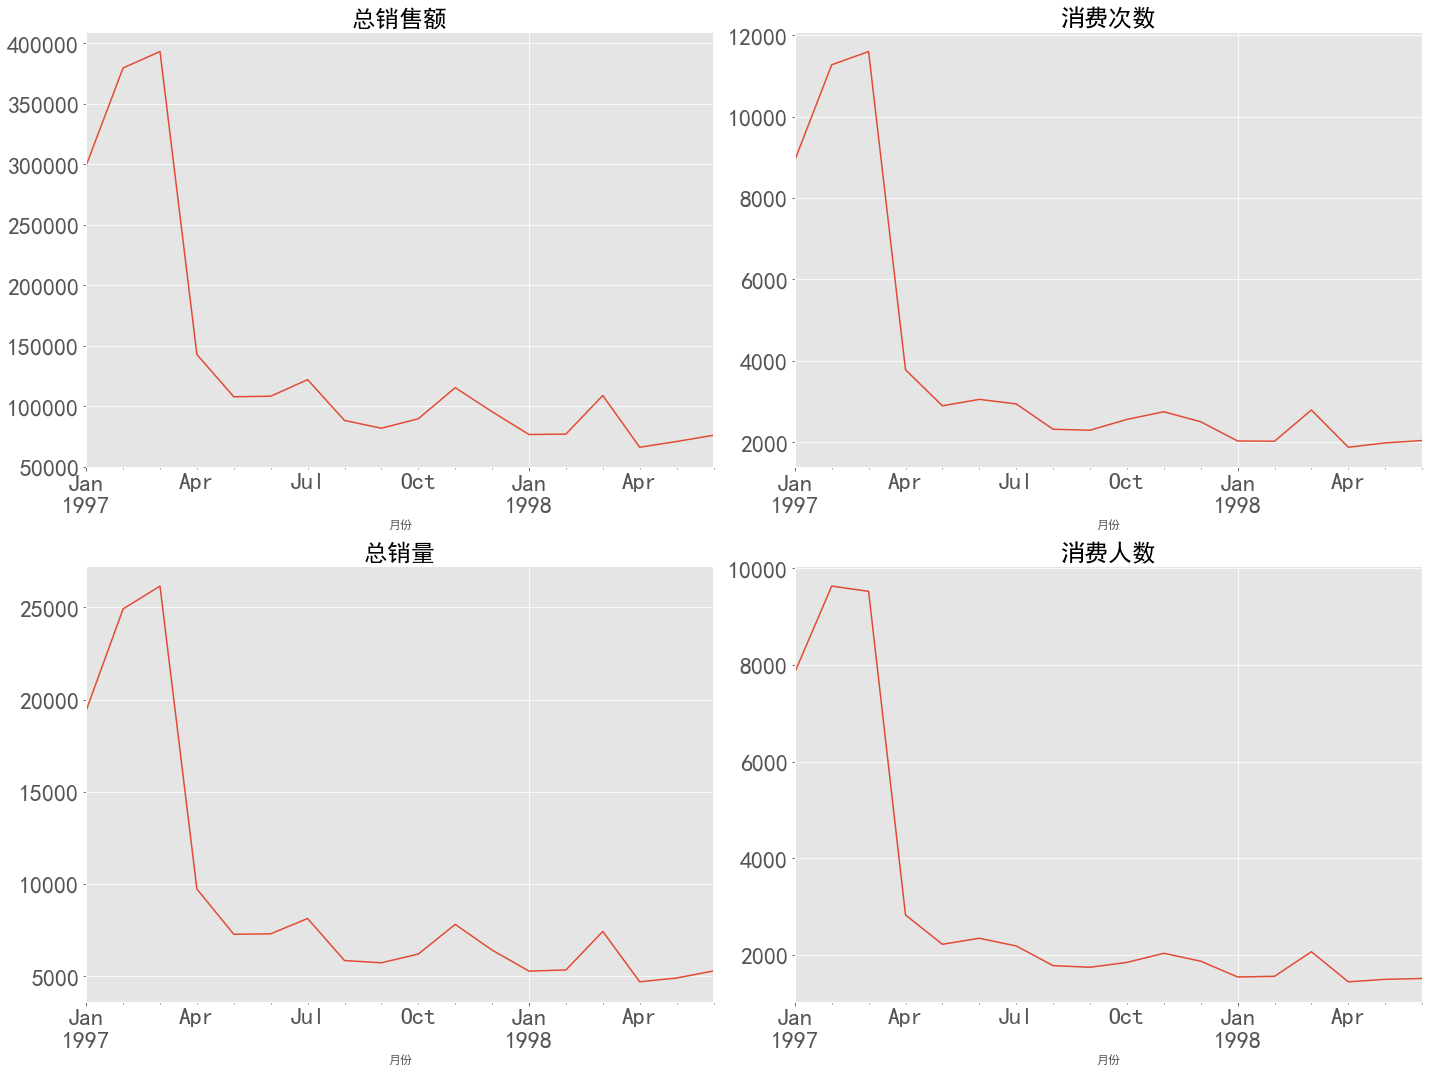

In [14]:
'''
四、用户总体消费趋势分析
'''
# 解决中文显示参数设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
# 设置图的大小，添加子图
plt.figure(figsize=(20,15))

# 每月的总销售额
plt.subplot(221)
df.groupby('月份')['订单金额'].sum().plot(fontsize=24) 
plt.title('总销售额', fontsize=24) 
 
# 每月的消费次数
plt.subplot(222)
df.groupby('月份')['购买日期'].count().plot(fontsize=24)
plt.title('消费次数', fontsize=24) 

# 每月的销量
plt.subplot(223)
df.groupby('月份')['订单数'].sum().plot(fontsize=24)
plt.title('总销量', fontsize=24)

# 每月的消费人数
plt.subplot(224)
df.groupby('月份')['用户ID'].apply(lambda x:len(x.unique())).plot(fontsize=24)
plt.title('消费人数', fontsize=24)
plt.tight_layout() # 设置子图的间距
plt.show()

In [15]:
"""
四个折线图的整体趋势基本一致，可以看出来，1997年前3个月的销量特别高，随之而来的销售额也是暴涨，在3月份之后骤然下降，接近平稳。
为什么会呈现这个原因呢？
我们假设是用户身上出了问题，早期时间段的用户中有异常值，第二假设是各类促销营销，但这里只有消费数据，所以无法判断。
另一方面，在2月到3月这段期间，可以发现消费人数稍有下降，
但总销量与总销售额却依然上升，是不是说明3月份的用户中有我们需要重点发展的高价值客户呢？
"""
print('')

In [16]:
'''
五、用户个体消费数据分析

之前我们维度是用户整体，看的是趋势。有时候我们也需要看个体来看这个人的消费能力如何，这里划分了五个方向如下：
5.1 用户消费金额，消费次数的描述统计
'''
# 根据用户id进行分组
group_user = df.groupby('用户ID').sum()
group_user.describe()

,订单数,订单金额
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [17]:
'''
从用户角度看，每位用户平均购买7张CD，最多的用户购买了1033张。
用户的平均消费金额（客单价）100元，标准差是240，结合分位数和最大值看，
平均值才和75分位接近，肯定存在小部分的高额消费用户，这也符合二八法则。
'''
print('')

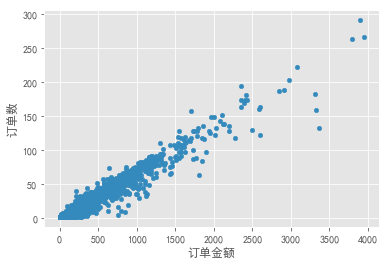

In [18]:
'''
5.2 用户消费金额和消费次数的散点图
'''
# 查询条件：订单金额 < 4000
group_user.query('订单金额 < 4000').plot.scatter(x='订单金额',y='订单数')

In [19]:
'''
绘制用户的散点图，用户比较健康而且规律性很强。
因为这是CD网站的销售数据，商品比较单一，金额和商品量的关系也因此呈线性，没几个离群点。
'''
print('')

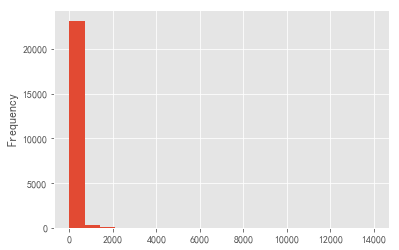

In [20]:
'''
5.3 用户消费金额的分布图（二八法则）
'''
group_user.订单金额. plot.hist(bins = 20)
#bins = 20,就是分成20块，最高金额是14000，每个项就是700

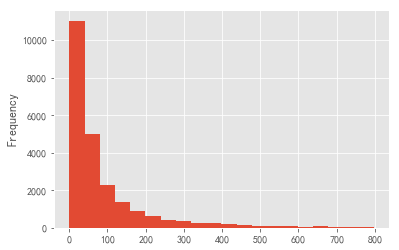

In [21]:
# 从图上看出，用户的消费呈集中趋势，可能是有个别的极大值干扰导致。可以排除极大值再看看分布情况
group_user.query('订单金额< 800')['订单金额'].plot.hist(bins=20)

In [22]:
'''
筛选出了消费金额小于800的用户，我们可以看到：

大部分用户的消费能力并不高，将近半数的用户消费金额不超过40元，高消费用户（ >200元 ）不超过2000人。
从上图直方图可知，大部分用户的消费能力确实不高，绝大部分呈现集中在很低的消费档次。
高消费用户在图上几乎看不到，这也确实符合消费行为的行业规律。
虽然有极端数据干扰，但是大部分的用户还是集中在比较低的消费档次。
'''
print('')

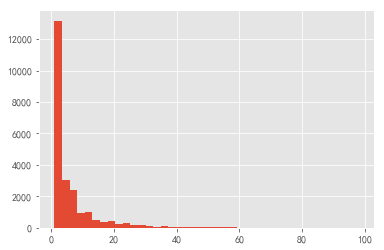

In [23]:
'''
5.4 用户消费次数的分布图（二八法则）
'''
group_user.query('订单数 < 100').订单数.hist(bins = 40)

In [24]:
'''
大部分用户购买CD的数量都是在3张以内，购买大量CD的用户数量并不多。
'''
print('')

In [25]:
'''
六、用户消费周期分析
6.1 用户购买周期（按订单）
6.1.1 用户消费周期描述
'''
#每个用户的每次购买时间间隔
order_diff = df.groupby('用户ID').apply(lambda x:x['购买日期'] - x['购买日期'].shift())
order_diff.head(10)

用户ID   
1     0        NaT
2     1        NaT
      2     0 days
3     3        NaT
      4    87 days
      5     3 days
      6   227 days
      7    10 days
      8   184 days
4     9        NaT
Name: 购买日期, dtype: timedelta64[ns]

In [26]:
# 上面结果是每个用户的每次购买时间间隔。

order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: 购买日期, dtype: object

In [27]:
'''
平均每个用户的购买时间间隔是68天，间隔最长的是533天。
想要召回用户，在60天左右的消费间隔是比较好的。
绝大部分用户的消费周期都低于100天。
'''
print('')

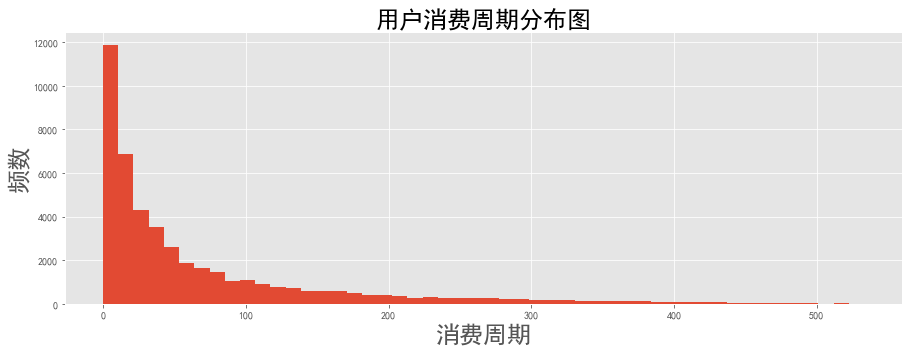

In [28]:
'''
6.1.2 用户消费周期分布
'''
plt.figure(figsize=(15,5))
plt.hist((order_diff / np.timedelta64(1, 'D')).dropna(), bins = 50)
plt.xlabel('消费周期',fontsize=24)
plt.ylabel('频数',fontsize=24)
plt.title('用户消费周期分布图',fontsize=24);

In [29]:
'''
典型的（指数）长尾分布，大部分用户的消费间隔确实比较短。
不妨将时间召回点设为消费后立即赠送优惠券，消费后10天询问用户礼品怎么样，消费后20天提醒优惠券到期，消费后30天短信推送。
'''
print('')

In [30]:
'''
6.2 用户生命周期（按第一次&最后一次消费）
6.2.1 用户生命周期描述
接下来计算每一位用户生命周期，这里定义第一次消费至最后一次消费为整个用户生命。
'''
orderdt_min=df.groupby('用户ID').购买日期.min()#第一次消费
orderdt_max=df.groupby('用户ID').购买日期.max()#最后一次消费
(orderdt_max-orderdt_min).head()

用户ID
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: 购买日期, dtype: timedelta64[ns]

In [31]:
# 计算用户的平均生命周期
(orderdt_max-orderdt_min).mean()

Timedelta('134 days 20:55:36.987696')

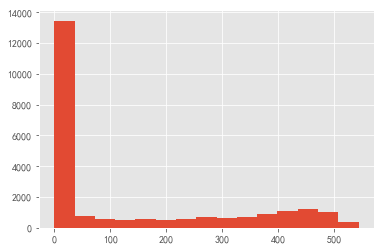

In [32]:
# 所有用户的平均生命周期是134天，比预想的高，但是平均数不具有代表性，接下来还是看一下分布情况。
'''
6.2.2 用户生命周期分布

因为数据类型是timedelta时间，无法直接作出直方图，所以先换算成数值。
换算的方式直接除timedelta函数即可，np.timedelta64(1, ‘D’)，D表示天，1表示1天，作为单位使用的。
因为max-min已经表示为天了，两者相除就是周期
'''

((orderdt_max-orderdt_min)/np.timedelta64(1,'D')).hist(bins=15)

In [33]:
'''
大部分用户只消费了一次，所有生命周期的大头都集中在了0天。
但这不是我们想要的答案，不妨将只消费了一次的新客排除，来计算所有消费过两次以上的老客的生命周期。
'''

#计算所有消费过两次以上的老客的生命周期
life_time = (orderdt_max - orderdt_min).reset_index()
life_time.head()

,用户ID,购买日期
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


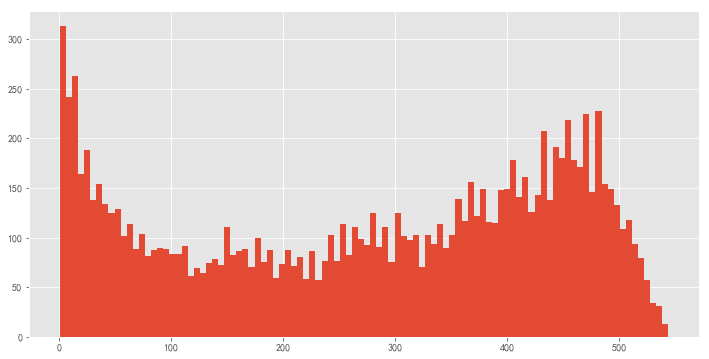

In [34]:
# 转换成DataFrame
# 用户生命周期分布图
plt.figure(figsize=(10,5))
life_time['life_time'] = life_time.购买日期 / np.timedelta64(1,'D')
life_time[life_time.life_time > 0].life_time.hist(bins = 100, figsize = (12,6))

In [35]:
'''
上图可见，用户生命周期呈现双峰趋势，20天内生命周期的用户是一个高峰，400至500天内生命周期的用户是另一个高峰。
根据此情况，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；
在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。
分析去掉0天生命周期的用户之后的用户生命周期的平均值。
'''

#去掉0天生命周期的用户之后的用户生命周期的平均值
life_time[life_time.life_time>0].购买日期.mean()

Timedelta('276 days 01:04:31.344216')

In [36]:
'''
可见，若在用户首次消费后，加强对其再次消费的引导，可将其生命周期延长至原来的两倍。
'''
print('')

In [37]:
'''
七、用户分层
7.1 按用户价值分层---RFM模型
为了进行精细化运营，可以利用RMF模型对用户价值指数（衡量历史到当前用户贡献的收益）进行计算，其中
最近一次消费-R：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近。
消费频率-F：客户在最近一段时间内交易的次数。F值越大，表示客户交易越频繁，反之则表示客户交易不够活跃。
消费金额-M：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。
根据上述三个维度，对客户做细分
'''

rfm = df.pivot_table(index = '用户ID',
                     values = ['订单金额','购买日期','订单数'],
                     aggfunc = {'订单金额':'sum',
                                '购买日期':'max',
                                '订单数':'sum'})
rfm.head()

,订单数,订单金额,购买日期
用户ID,,,
1,1,11.77,1997-01-01
2,6,89.00,1997-01-12
3,16,156.46,1998-05-28
4,7,100.50,1997-12-12
5,29,385.61,1998-01-03


In [38]:
# 日期的最大值与当前日期的差值为R
rfm['R'] = (rfm['购买日期'].max() - rfm['购买日期']) / np.timedelta64(1,'D')
rfm.rename(columns = {'订单金额':'M',
                     '订单数':'F'},
          inplace=True)

# 构建rfm模型公式
def get_rfm(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    
    result = d[label]
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x:(x-x.mean()) / x.std()).apply(get_rfm,axis=1)
rfm.head()
#求和
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,650,7181.28,36295.0
一般保持客户,1712,19937.45,29448.0
一般发展客户,13977,196971.23,591108.0
一般挽留客户,29346,438291.81,6951815.0
重要价值客户,11121,167080.83,358363.0
重要保持客户,107789,1592039.62,517267.0
重要发展客户,2023,45785.01,56636.0
重要挽留客户,1263,33028.40,114482.0


In [39]:
# M列中不同层次客户的消费累计金额，重要保持客户的累计消费金额为159203.62，排名最高
rfm.groupby('label').size()

label
一般价值客户       77
一般保持客户      206
一般发展客户     3300
一般挽留客户    14074
重要价值客户      787
重要保持客户     4554
重要发展客户      331
重要挽留客户      241
dtype: int64

In [40]:
'''
以上为不同层次用户的消费人数，一般挽留用户的消费人数排名第一，有14074人，
重要保持客户排名第二，有4554人，与一般挽留用户差距比较大，但累计消费金额最多，
业务方可以根据结果对客户分类运营，降低营销成本，提高ROI。
'''

print('')

In [41]:
'''
7.2 按用户活跃程度分层---新用户、活跃用户、不活跃用户、回流用户

新用户的定义是第一次消费。
活跃用户即老客，在某一个时间窗口内有过消费。
不活跃用户则是时间窗口内没有消费过的老客。
回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。
'''

# 将用户消费数据进行数据透视：
# 用户活跃程度分层
# 将用户消费数据进行数据透视：
df1 = df.pivot_table(index = "用户ID",
                     columns = "月份",
                     values = '购买日期',
                     aggfunc = 'count').fillna(0)
df1.head() 

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# 图中的数字（0，1，2）代表了当月的消费次数。

df2 = df1.applymap(lambda x:1 if x>0 else 0)
df2.tail()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
# 0代表当月没有消费，1代表有消费。
print('')

In [44]:
def active_status(data):
    status=[]
    for i in range(18): #共18个月
        
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:#前面某月消费过，是老客
                if status[i-1]=='unreg':#前一个月不是首次消费，不是新客
                    status.append('unreg')#则本月也不是新客
                else:
                    status.append('unactive')#前一个月是首次消费，属于新客，则本月为不活跃用户
            else:
                status.append('unreg')#前面某月没有消费过，则本月也不是新客
         #若本月消费
        else:
            if len(status)==0:#前面没有消费过
                status.append('new')#则为新客
            else:#前面消费过
                if status[i-1] =='unactive':#前一个月没有消费，是不活跃用户
                    status.append('return')#本月为回流用户
                elif status[i-1]=='unreg':#前一个月没有消费，不是新客
                    status.append('new')
                else:#前一个月是首次消费
                    status.append('active')#本月为活跃用户
                    
    return status

In [45]:
'''
可得到一张不同用户在不同月份的不同状态
（new=新、active=活跃、return=回流、unactive=流失）,unreg相当于未注册，
指这个用户在这个月及以前从未购买过产品，主要为了统计起来更加方便而加进去。

'''
indexs=df['月份'].sort_values().astype('str').unique()
df3=df2.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
df3.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [50]:
# 把unreg替换成NaN，再用fillna(0)把空值填为0。然后转置，把月份作为索引行，状态作为列，得到如下的表
df4=df3.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0)
df4

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,0.0,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


In [51]:
df4=df3.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T
df4

,active,new,return,unactive
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0
1997-10-01,532.0,0.0,1307.0,21731.0


In [52]:
'''
从表中可以看出，新客都是集中在前三个月，回流用户整体在1000左右，而不活跃用户数量随时间稍有上升
'''
print('')

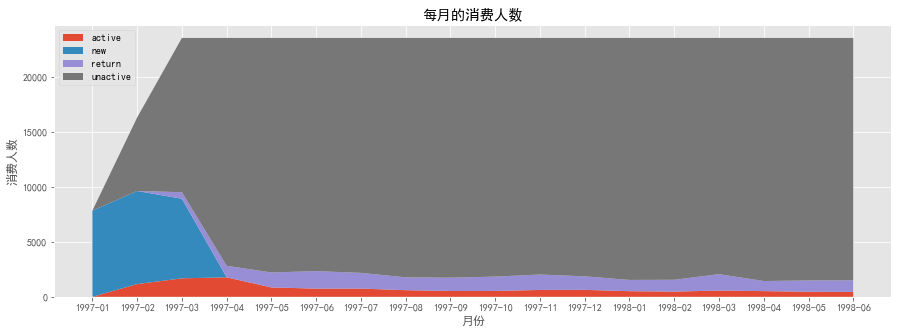

In [53]:
#作出非堆积效果图：
u =df4.reset_index()
labels = u[['active','new','return','unactive']].columns
plt.figure(figsize=(15,5))
plt.stackplot(u['index'].astype(str).apply(lambda x:x[:-3]), u['active'],u['new'],u['return'],u['unactive'], labels=labels)
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月的消费人数')
plt.legend(loc = 'upper left');

In [54]:
# 每一层用户占总用户的比例
df5=df4.apply(lambda x:x/x.sum(),axis=1)
df5

,active,new,return,unactive
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220
1997-10-01,0.022571,0.000000,0.055452,0.921977


In [55]:
'''
由上表可知，每月的用户消费状态变化：

新客用户：仅在前三个月，后续再无新增客户。
活跃用户：比例持续下降，说明持续消费的用户数量在减少，也说明运营部门的促活效果并不好。
回流用户：比例也稍有下降，在4%左右波动。
不活跃用户：比例稍有上升，流失较大。
'''
print('')

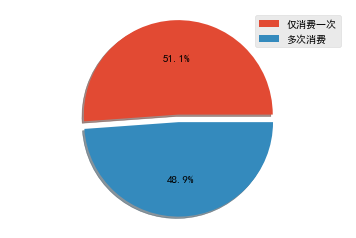

In [56]:
'''
八、用户质量分析
8.1 多少用户仅消费了一次？ (一天内消费多次记作一次)
'''
a = df.groupby('用户ID')['购买日期'].agg(['min','max']).reset_index()
new_old = (a['min'] == a['max']).value_counts().values

plt.pie(x = new_old,
       autopct = '%.1f%%',
       shadow = True,
       explode = [0.08,0],
       textprops = {'fontsize' : 11})
plt.axis('equal') 
plt.legend(['仅消费一次','多次消费'])

In [57]:
# 有超过一半的用户仅消费了一次，这也说明了运营不利，留存效果不好。
print('')

In [58]:
'''
8.2 复购率
复购率的定义：在某时间窗口内消费两次及以上的用户在总消费用户中占比。
这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户
'''
# 每个用户在每月的订单数
pivoted_df=df.pivot_table(index='用户ID',columns='月份',values='购买日期',#pivot_table透视表
                       aggfunc='count').fillna(0)#某些用户在某月没有消费过，用nan表示，这里用0填充

pivoted_df.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# 转换：消费2次以上记为1，消费1次记为0，消费0次记为NAN  
#applymap针对dataframe所有数据
pivoted_df_transf=pivoted_df.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_df_transf.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '复购率的变化')

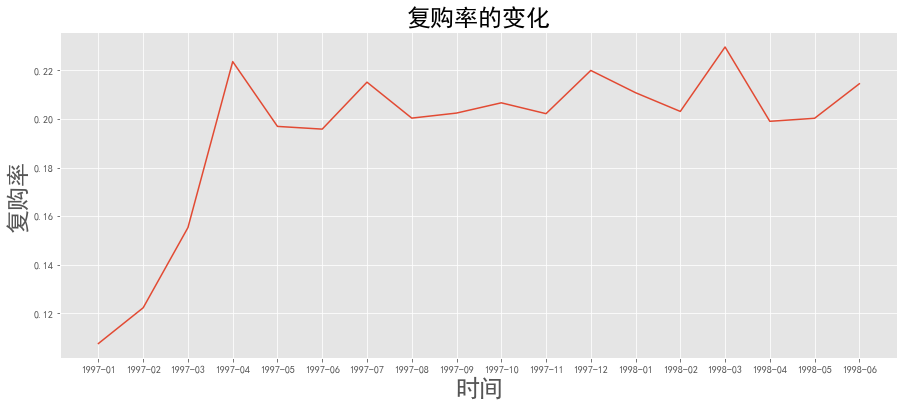

In [61]:
# count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
df_duplicate =pd.DataFrame(pivoted_df_transf.sum()/pivoted_df_transf.count()).reset_index()
df_duplicate.columns = ['Date', 'DuplicatedRate']
df_duplicate['Date'] = df_duplicate.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,6))
plt.plot(df_duplicate.Date, df_duplicate.DuplicatedRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('复购率',fontsize=24)
# plt.ylim(0,1)
plt.title('复购率的变化',fontsize=24)

In [63]:
'''
说明：图上可以看出复购率在早期，因为大量新用户加入的关系，新客的复购率并不高，如1月新客们的复购率只有6%左右。
而在后期，这时的用户都是大浪淘沙剩下的老客，复购率比较稳定，在20%左右。单看新客和老客，复购率有三倍左右的差距。
'''
print('')

In [64]:
'''
8.3 回购率
回购率：是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。
比如，1月消费用户1000，他们中有300个2月依然消费，回购率是30%。
'''
# 回购率
# 每个用户每个月平均消费金额
pivoted_money=df.pivot_table(index='用户ID',columns='月份',values='订单金额',
                             aggfunc='mean').fillna(0)

columns_month=df.月份.sort_values().astype('str').unique()
pivoted_money.columns=columns_month
pivoted_money.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [65]:
# 将有消费的记为1，没有消费的记为0
pivoted_purchase=pivoted_money.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [66]:
# 如果本月进行消费，下月也进行消费，则记为1；如果下月没有消费，则记为0，若本月没有记为消费，则记为nan
def purchase_return(data):
    status=[]
    for i in range(17):#循环17个月
        if data[i]==1:#若本月消费
            if data[i+1]==1:#下个月也消费
                status.append(1)#就记为1
            if data[i+1]==0:#下个月不消费，就记为0
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status, index=columns_month)

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)#axis=1表示计算方向在行的方向上，左右运算
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


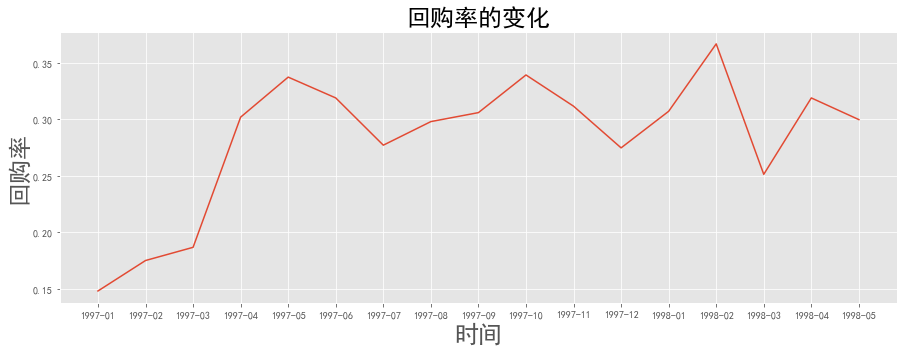

In [67]:
df_purchase = (pivoted_purchase_return.sum() / pivoted_purchase_return.count()).reset_index()
df_purchase.columns = ['Date', 'PurchaseRate']
df_purchase['Date'] = df_purchase.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,5))
plt.plot(df_purchase.Date, df_purchase.PurchaseRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('回购率', fontsize=24)
plt.title('回购率的变化', fontsize=24);

In [68]:
'''
上图可以看出，在初期用户的回购率并不高，1月的回购率只有15%左右，4月份起回购率稳定在30%左右。
从每月有回购消费的用户数数据可以看出，回购用户数整体有下降趋势。
对回购率的分析，再次说明了对于新用户，在其第一次消费后的三个月内是一段重要的时期，需要营销策略积极引导其再次消费及持续消费。
另外，对于有持续消费的老客，也要适时推出反馈老客户的优惠活动，以加强老客的忠诚度。
'''
print('')

In [69]:
'''
8.4 分析留存率(3,7,15,30,90,365天为周期)
留存率：它指用户在第一次消费后，有多少比率进行第二次消费。
消费日期 - 第一次消费日期 = 第二次消费与第一次消费的时间间隔 ，再将天数转化为数值
'''
# 分析留存率
# 新建一个对象，并增加用户第一次消费时间的列,merge将两个dataframe合并
data_t=df[['用户ID','购买日期','订单数','订单金额']]
user_purchase_retention=pd.merge(left=data_t,right=orderdt_min.reset_index(),
how='inner',on='用户ID',suffixes=('','_min'))
user_purchase_retention.head(5)

,用户ID,购买日期,订单数,订单金额,购买日期_min
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12
2,2,1997-01-12,5,77.00,1997-01-12
3,3,1997-01-02,2,20.76,1997-01-02
4,3,1997-03-30,2,20.76,1997-01-02


In [70]:
# 增加一列，表示订单日期与用户首次消费日期间的间隔时间
# 每一次消费时间与第一次消费时间间隔
user_purchase_retention['order_date_diff']=user_purchase_retention['购买日期']-user_purchase_retention['购买日期_min']
# 将timedelta转换为数值型
user_purchase_retention['date_diff']=user_purchase_retention.order_date_diff.apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention.head(5)

,用户ID,购买日期,订单数,订单金额,购买日期_min,order_date_diff,date_diff
0,1,1997-01-01,1,11.77,1997-01-01,0 days,0.0
1,2,1997-01-12,1,12.00,1997-01-12,0 days,0.0
2,2,1997-01-12,5,77.00,1997-01-12,0 days,0.0
3,3,1997-01-02,2,20.76,1997-01-02,0 days,0.0
4,3,1997-03-30,2,20.76,1997-01-02,87 days,87.0


In [71]:
'''
将时间差值分桶处理：
分成0～3天内，3～7天内，7～15天……代表用户当前消费时间距第一次消费属于哪个时间段
'''
# 将时间间隔分桶（0-3）（3-7）等
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,bins=bin)
user_purchase_retention.head(10)

,用户ID,购买日期,订单数,订单金额,购买日期_min,order_date_diff,date_diff,date_diff_bin
0,1,1997-01-01,1,11.77,1997-01-01,0 days,0.0,NaN
1,2,1997-01-12,1,12.00,1997-01-12,0 days,0.0,NaN
2,2,1997-01-12,5,77.00,1997-01-12,0 days,0.0,NaN
3,3,1997-01-02,2,20.76,1997-01-02,0 days,0.0,NaN
4,3,1997-03-30,2,20.76,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,1997-04-02,2,19.54,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,1997-11-15,5,57.45,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,1997-11-25,4,20.96,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,1998-05-28,1,16.99,1997-01-02,511 days,511.0,NaN
9,4,1997-01-01,2,29.33,1997-01-01,0 days,0.0,NaN


In [72]:
'''
这里date_diff=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。
另外，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。
pivot_table数据透视，Pandas函数pivot_table会默认删除含有空值的行，用dropna=False保持NaN的值。
'''
# 用户第一次消费之后，后续各时间段的消费总额
pivoted_retention=user_purchase_retention.pivot_table(index='用户ID',
columns='date_diff_bin',values='订单金额',aggfunc=sum,dropna=False)
pivoted_retention.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
用户ID                                                                   
1                 NaN     NaN      NaN       NaN       NaN       NaN   
2                 NaN     NaN      NaN       NaN       NaN       NaN   
3                 NaN     NaN      NaN       NaN       NaN      40.3   
4                 NaN     NaN      NaN     29.73       NaN       NaN   
5                 NaN     NaN    13.97       NaN      38.9       NaN   

date_diff_bin  (90, 180]  (180, 365]  
用户ID                                  
1                    NaN         NaN  
2                    NaN         NaN  
3                    NaN       78.41  
4                    NaN       41.44  
5                  110.4      155.54  

In [73]:
# 获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额
pivoted_retention.mean() # 各时间段的平均消费额

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [77]:
'''
虽然后面时间段的金额高，但是它的时间范围也宽广。
从平均效果看，用户第一次消费后的0～3天内，更可能消费更多。
依旧将数据转换成是否，1代表在该时间段内有后续消费，0代表没有：
'''
# 1代表有消费，0代表没有
pivoted_retention_trans=pivoted_retention.applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()

date_diff_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
用户ID                                                                   
1                   0       0        0         0         0         0   
2                   0       0        0         0         0         0   
3                   0       0        0         0         0         1   
4                   0       0        0         1         0         0   
5                   0       0        1         0         1         0   

date_diff_bin  (90, 180]  (180, 365]  
用户ID                                  
1                      0           0  
2                      0           0  
3                      0           1  
4                      0           1  
5                      1           1  

Text(0.5, 1.0, '留存率')

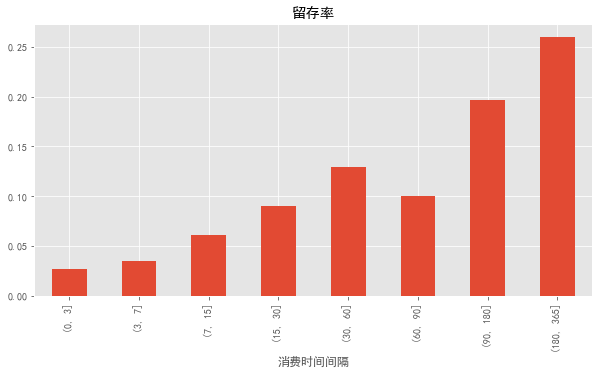

In [78]:
# 每笔订单离第一笔订单的时间间隔
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize=(10,5))
plt.xlabel('消费时间间隔')
plt.title('留存率')

In [79]:
'''
只有2.5%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。
数字并不好看，CD购买确实不是高频消费行为。
有20%的用户在第一次消费后的三个月到半年之间有过购买，27%的用户在半年后至1年内有过购买。

从运营角度看，CD机营销在服务新用户的同时，应该注重用户忠诚度的培养，放长线掉大鱼，在一定时间内召回用户购买。

'''
print('')

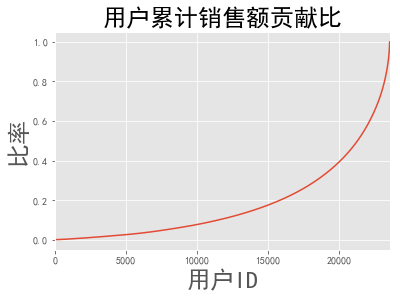

In [80]:
'''
8.5 大客户的贡献率
因为消费行为有明显的二八倾向，想知道高质量用户为消费贡献了多少份额？

8.5.1 用户销售额贡献情况：
按照用户id分组，对用户的消费金额进行累计求和 ，然后与总销售额比，得到比率，横坐标是用户的id。
'''

# 先将用户消费金额按升序排列，逐行计算用户累计金额，最后一行是总消费金额
user_money=df.groupby('用户ID').订单金额.sum().sort_values().reset_index()
user_money['money_cumsum']=user_money.订单金额.cumsum()
money_total=user_money.money_cumsum.max()
# 转行成百分比
user_money['prop']=user_money.apply(lambda x:x.money_cumsum/money_total,axis=1)#apply用在每个行上
user_money.tail()
user_money.prop.plot()
plt.xlabel('用户ID', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计销售额贡献比', fontsize=24);

In [81]:
'''
说明：前20000个用户，大约80%的用户贡献了40%的销售额，20%的用户贡献了60%的销售额
'''
print('')

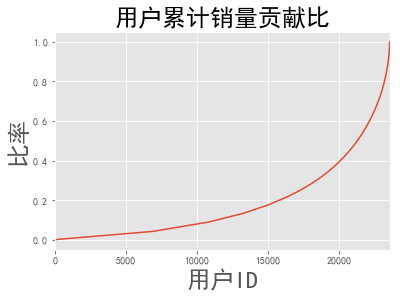

In [82]:
'''
8.5.2 用户销量贡献情况：
'''
# 先将用户销量按升序排列，逐行计算用户累计销量，最后一行是总销量
user_productsSum=df.groupby('用户ID').订单数.sum().sort_values().reset_index()
user_productsSum['products_cumsum']=user_productsSum.订单数.cumsum()
productsSum_total=user_productsSum.products_cumsum.max()
# 转行成百分比
user_productsSum['prop']=user_productsSum.apply(lambda x:x.products_cumsum/productsSum_total,axis=1)#apply用在每个行上
user_productsSum.tail()
user_productsSum.prop.plot()
plt.xlabel('用户ID', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计销量贡献比', fontsize=24);

In [83]:
'''
说明：跟销售额十分接近。

前20000名用户贡献了40%的消费，而后3500名用户贡献了60%的消费。
符合二八趋势。
也就是说我们只要维护了这3500个用户就可以把业绩KPI完成60%，如果能把3500个用户运营的更好就可以占比70%—80%之间。
'''
print('')

In [84]:
'''
九、结论

1.整体趋势：
按年的月份趋势销量和销售额在1-3月份相对极高，然后骤降，原因可能跟这段时间的大力促销或与商品的季度属性有关。

2.用户个体特征：
每笔订单的金额和商品购买量都集中在区间的低段水平，都是小金额小批量进行购买，此类交易群体，可在丰富产品线和增加促销活动提高转换率和购买率。

3.大部分用户的消费总额和购买总量都集中刚在低段，长尾分布，这个跟用户需求有关，可以对商品进行多元文化价值的赋予，增强其社交价值属性，提高用户的价值需求。

4.用户的消费周期：
有二次以上消费的用户，平均68天，所以在50天到60天期间，应该对这批用户进行刺激召回，细致点，
比如10天回复满意度，30天发放优惠券，55天的时候提醒优惠券的使用。

5.用户的生命周期：
有二次及以上消费的用户的平均生命周期是276天。
用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；
在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

6.新客户的复购率约为6%，老客户的复购率在20%左右；
  新客户的回购率在15%左右，老客户的回购率在30%左右，需要营销策略积极引导其再次消费及持续消费。

7.用户质量：用户个体消费有一定规律性，大部分用户的消费集中在2000以下，用户消费反应了2/8法则，消费排名前20%的用户贡献了80%的消费额。
  所以说，狠抓高质量用户是万古不变的道理，这些高质量客户都是“会员”类型，需要专门为会员优化购物体验，比如专线接听、特殊优惠等等。
  
  留存率来看，一半的用户会流失，所以应该注重对用户的忠诚度的培养，比如打卡签到，积分制度，老用户打折制度会员升级制度。

'''
print('')